## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_excel("fish.xlsx")

We created one Excel table and then we filled the values into this file then saved as "fish.xlsx"

In [3]:
dataset

,skin_color,weight,width_size,height,dorsal_fin_size,eye_diameter,class
0,blue,8.302707,1.167420,19.184339,6.193168,0.506914,0
1,blue,7.418877,2.198725,12.464850,6.498403,0.626358,0
2,blue,9.499399,2.568813,17.449198,6.360583,0.769239,0
3,blue,7.680885,1.191879,12.786238,6.447008,0.448620,0
4,blue,7.502223,2.806455,13.940972,6.355912,0.985559,0
...,...,...,...,...,...,...,...
95,red,128.601004,5.816665,20.686216,10.807237,0.582889,1
96,red,103.316794,3.490792,15.126622,11.214208,0.002602,1
97,red,110.608310,3.198861,29.323495,11.097603,1.199941,1
98,red,121.906324,4.445191,28.765103,6.704414,0.741137,1


In our dataset has 6 data values and 1 target value, in our dataset every data must be numerical so we should check it.

## Preprocessing

In [4]:
dataset.dtypes

skin_color          object
weight             float64
width_size         float64
height             float64
dorsal_fin_size    float64
eye_diameter       float64
class                int64
dtype: object

As you see that, our skin_color value is object so we should convert it to integer.

At this step, we can use LabelEncoder as well for convert to object data to integer.

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset["skin_color"] = le.fit_transform(dataset["skin_color"])

In [6]:
dataset.dtypes

skin_color           int32
weight             float64
width_size         float64
height             float64
dorsal_fin_size    float64
eye_diameter       float64
class                int64
dtype: object

## Visualization

### Box Plot

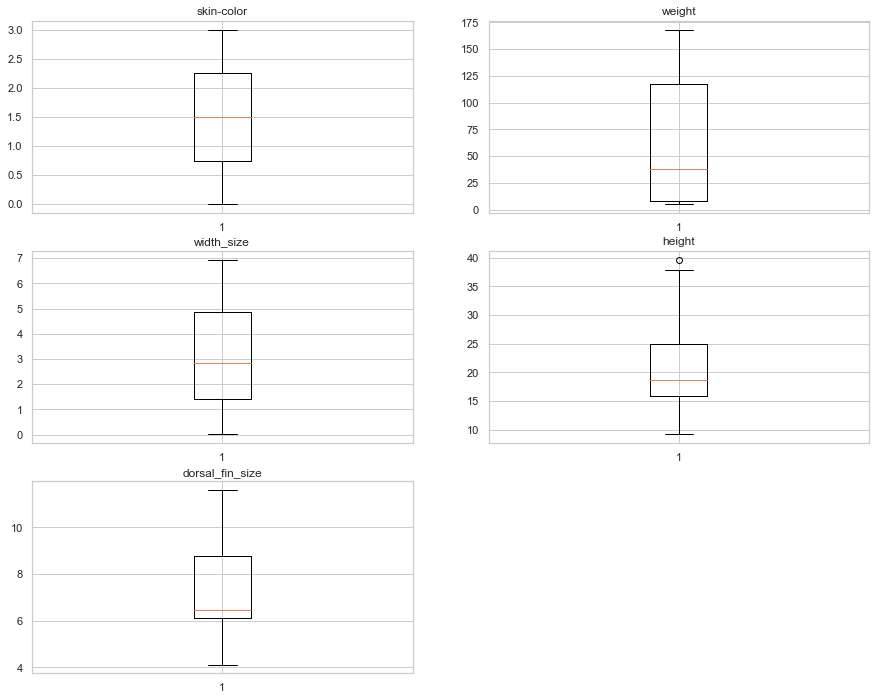

In [7]:
sbn.set_theme(style="whitegrid")
plt.figure(figsize=(15, 12))
plt.subplot(3, 2, 1)
plt.boxplot(dataset["skin_color"])
plt.title("skin-color")
plt.subplot(3, 2, 2)
plt.boxplot(dataset["weight"])
plt.title("weight")
plt.subplot(3, 2, 3)
plt.boxplot(dataset["width_size"])
plt.title("width_size")
plt.subplot(3, 2, 4)
plt.boxplot(dataset["height"])
plt.title("height")
plt.subplot(3, 2, 5)
plt.boxplot(dataset["dorsal_fin_size"])
plt.title("dorsal_fin_size")
plt.show()

### Scatter Plot

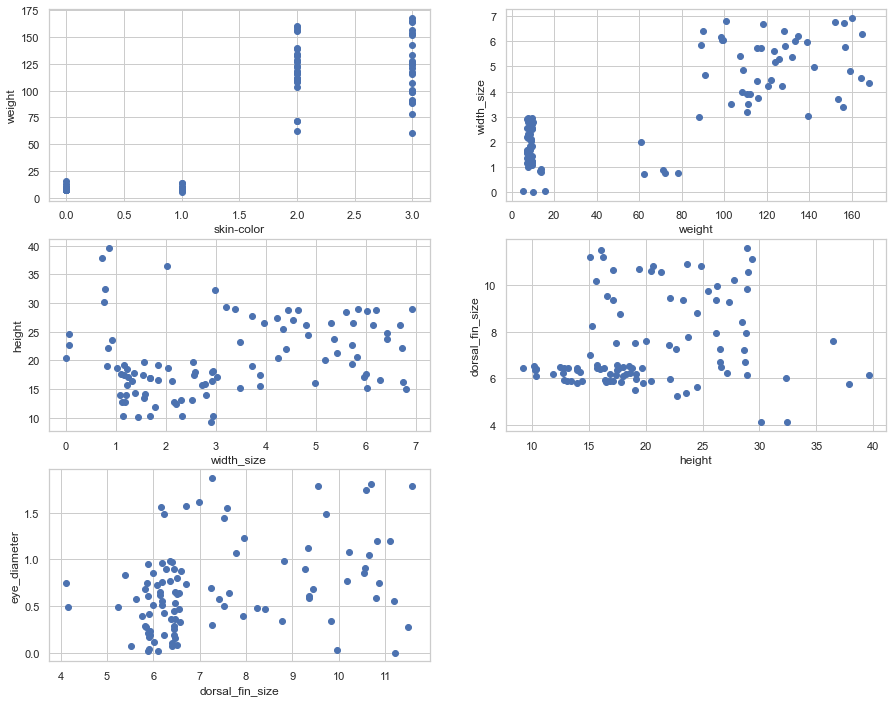

In [8]:
plt.figure(figsize=(15, 12))
plt.subplot(3, 2, 1)
plt.scatter(dataset["skin_color"],dataset["weight"])
plt.xlabel("skin-color")
plt.ylabel("weight")
plt.subplot(3, 2, 2)
plt.scatter(dataset["weight"],dataset["width_size"])
plt.xlabel("weight")
plt.ylabel("width_size")
plt.subplot(3, 2, 3)
plt.scatter(dataset["width_size"],dataset["height"])
plt.xlabel("width_size")
plt.ylabel("height")
plt.subplot(3, 2, 4)
plt.scatter(dataset["height"],dataset["dorsal_fin_size"])
plt.xlabel("height")
plt.ylabel("dorsal_fin_size")
plt.subplot(3, 2, 5)
plt.scatter(dataset["dorsal_fin_size"],dataset["eye_diameter"])
plt.xlabel("dorsal_fin_size")
plt.ylabel("eye_diameter")
plt.show()

### Correlation

<AxesSubplot:>

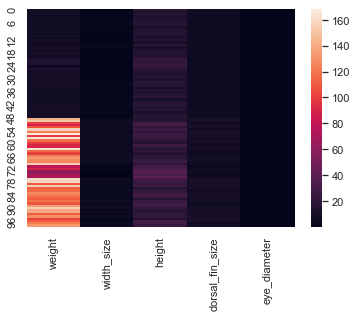

In [9]:
sbn.heatmap(dataset[["weight","width_size","height","dorsal_fin_size","eye_diameter"]])

### Histogram

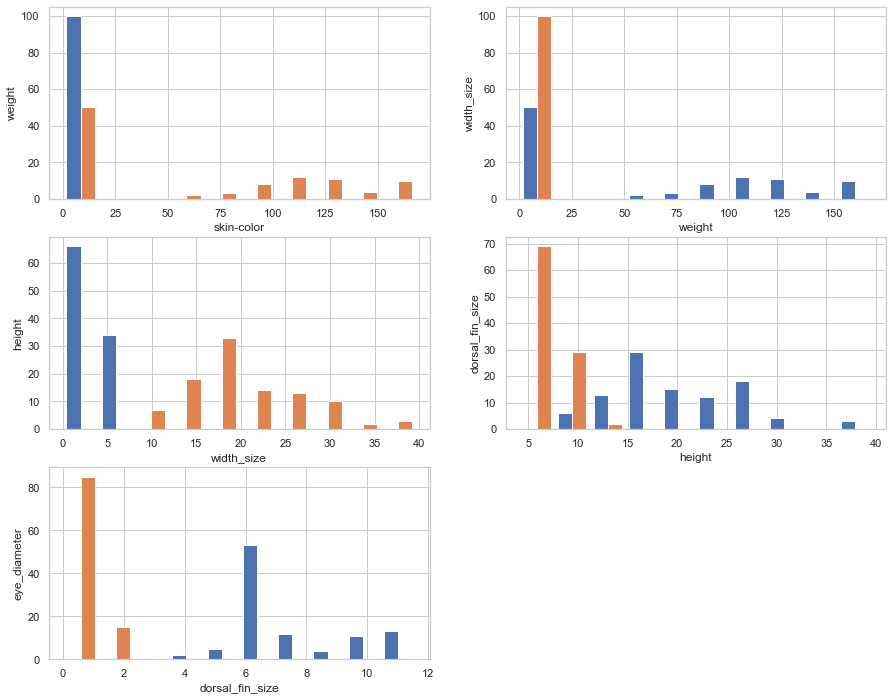

In [10]:
plt.figure(figsize=(15, 12))
plt.subplot(3, 2, 1)
plt.hist(dataset[["skin_color","weight"]])
plt.xlabel("skin-color")
plt.ylabel("weight")
plt.subplot(3, 2, 2)
plt.hist(dataset[["weight","width_size"]])
plt.xlabel("weight")
plt.ylabel("width_size")
plt.subplot(3, 2, 3)
plt.hist(dataset[["width_size","height"]])
plt.xlabel("width_size")
plt.ylabel("height")
plt.subplot(3, 2, 4)
plt.hist(dataset[["height","dorsal_fin_size"]])
plt.xlabel("height")
plt.ylabel("dorsal_fin_size")
plt.subplot(3, 2, 5)
plt.hist(dataset[["dorsal_fin_size","eye_diameter"]])
plt.xlabel("dorsal_fin_size")
plt.ylabel("eye_diameter")
plt.show()

Now the dataset is looking better than before, after that step we can distinguish our datas and target value

In [11]:
X = dataset.drop(columns ="class",axis = 0).values
y = dataset[["class"]].values.ravel()

In [12]:
X,y = shuffle(X,y)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=41)

Above the code means that, we have a dataset with 100 rows and we should split our datas %30 testing and %70 training, then we can work on our 70 rows's values afterward we can test it with 30 percent of testing datas.

## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train,y_train)

y_predict = dt_classifier.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix

We defined accuracy score and confusion matrix for see the results.

Accuracy Score which is how much percent accuracy we have in our values.

Confusion Matrix which is in our 30 testing datas that how many datas are true negative, false positive, false negative and ture positive

In [16]:
print("Accuracy score is: ",accuracy_score(y_test,y_predict))
print("Confusion matrix is(tn,fp,fn,tp) :\n",confusion_matrix(y_test,y_predict))

Accuracy score is:  1.0
Confusion matrix is(tn,fp,fn,tp) :
 [[19  0]
 [ 0 11]]


## KNN

In [17]:
X,y = shuffle(X,y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=41)

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train,y_train)

y_predict = knn_classifier.predict(X_test)

In [18]:
print("Accuracy score is: ",accuracy_score(y_test,y_predict))
print("Confusion matrix is(tn,fp,fn,tp) :\n",confusion_matrix(y_test,y_predict))

Accuracy score is:  1.0
Confusion matrix is(tn,fp,fn,tp) :
 [[15  0]
 [ 0 15]]


## Ensemble

In [19]:
X,y = shuffle(X,y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=41)
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=10)

rf_classifier.fit(X_train,y_train)

y_predict = rf_classifier.predict(X_test)

In [20]:
print("Accuracy score is: ",accuracy_score(y_test,y_predict))
print("Confusion matrix is(tn,fp,fn,tp) :\n",confusion_matrix(y_test,y_predict))

Accuracy score is:  1.0
Confusion matrix is(tn,fp,fn,tp) :
 [[17  0]
 [ 0 13]]


In [1]:
print("Hello")

Hello
